# Introduction

In [ ]:
"""
What? Features selection for REGRESSION problem

https://machinelearningmastery.com/feature-selection-for-regression-data/
"""

#  Import python modules

In [6]:
from pylab import rcParams
from matplotlib import pyplot
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_regression
from IPython.display import Markdown, display
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression, mutual_info_regression

# Checking python module versions

In [7]:
def printPythonModuleVersion():    
    
    """printPythonModuleVersion
    Quickly list the python module versions
    """
    
    import scipy
    print('scipy: %s' % scipy.__version__)
    import numpy
    print('numpy: %s' % numpy.__version__)    
    import matplotlib
    print('matplotlib: %s' % matplotlib.__version__)    
    import pandas
    print('pandas: %s' % pandas.__version__)
    import statsmodels
    print('statsmodels: %s' % statsmodels.__version__) 
    import sklearn
    print('sklearn: %s' % sklearn.__version__)
    import xgboost
    print('xgboostn: %s' % xgboost.__version__)    

printPythonModuleVersion()

scipy: 1.4.1
numpy: 1.18.5
matplotlib: 3.3.2
pandas: 1.1.4
statsmodels: 0.12.1
sklearn: 0.23.2
xgboostn: 1.2.1


# Feature selection function

In [8]:
def select_features(X_train, y_train, X_test, chosenMethod):
    # configure to select all features
    fs = SelectKBest(score_func = chosenMethod, k = 'all') 
    # learn relationship from training data 
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# Create fictitious REGRESSION dataset

In [ ]:
"""
The make regression() function from the scikit-learn library can be used to define a dataset.
It provides control over the number of samples, number of input features, and, importantly, 
the number of relevant and irrelevant input features.
"""

In [9]:
# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

### f_regression

In [10]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, f_regression)
# what are scores for the features
for i in range(len(fs.scores_)): 
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.009419
Feature 1: 1.018881
Feature 2: 1.205187
Feature 3: 0.000138
Feature 4: 0.167511
Feature 5: 5.985083
Feature 6: 0.062405
Feature 7: 1.455257
Feature 8: 0.420384
Feature 9: 101.392225
Feature 10: 0.387091
Feature 11: 1.581124
Feature 12: 3.014463
Feature 13: 0.232705
Feature 14: 0.076281
Feature 15: 4.299652
Feature 16: 1.497530
Feature 17: 0.261242
Feature 18: 5.960005
Feature 19: 0.523219
Feature 20: 0.003365
Feature 21: 0.024178
Feature 22: 0.220958
Feature 23: 0.576770
Feature 24: 0.627198
Feature 25: 0.350687
Feature 26: 0.281877
Feature 27: 0.584210
Feature 28: 52.196337
Feature 29: 0.046855
Feature 30: 0.147323
Feature 31: 0.368485
Feature 32: 0.077631
Feature 33: 0.698140
Feature 34: 45.744046
Feature 35: 2.047376
Feature 36: 0.786270
Feature 37: 0.996190
Feature 38: 2.733533
Feature 39: 63.957656
Feature 40: 231.885540
Feature 41: 1.372448
Feature 42: 0.581860
Feature 43: 1.072930
Feature 44: 1.066976
Feature 45: 0.344656
Feature 46: 13.951551
Feature 47: 3.5

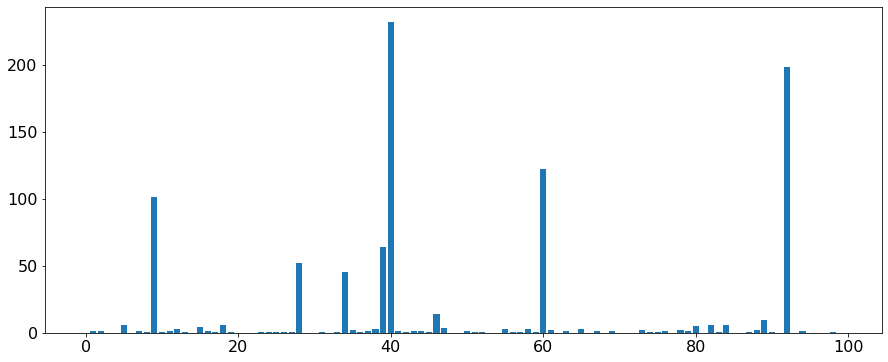

In [11]:
# plot the scores
rcParams['figure.figsize'] = 15, 6
rcParams['font.size'] = 16
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
"""
A bar chart of the feature importance scores for each input feature is created. 
The plot clearly shows 8 to 10 features are a lot more important than the other
features. We could set k = 10 When configuring the SelectKBest to select these 
top features.
"""

### mutual_info_regression

In [ ]:
"""
Mutual information from the field of information theory is the application of 
information gain (typically used in the construction of decision trees) to 
feature selection. Mutual information is calculated between two variables and
measures the reduction in uncertainty for one variable given a known value of
the other variable. Mutual information is straightforward when considering the
distribution of two discrete (categorical or ordinal) variables, such as categorical
input and categorical output data. Nevertheless, it can be adapted for use with 
numerical input and output data.
"""

In [12]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, mutual_info_regression)
# what are scores for the features
for i in range(len(fs.scores_)): 
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.045484
Feature 1: 0.000000
Feature 2: 0.000000
Feature 3: 0.000000
Feature 4: 0.024816
Feature 5: 0.000000
Feature 6: 0.022659
Feature 7: 0.000000
Feature 8: 0.000000
Feature 9: 0.074320
Feature 10: 0.000000
Feature 11: 0.000000
Feature 12: 0.000000
Feature 13: 0.000000
Feature 14: 0.020390
Feature 15: 0.004307
Feature 16: 0.000000
Feature 17: 0.000000
Feature 18: 0.016566
Feature 19: 0.003688
Feature 20: 0.007579
Feature 21: 0.018640
Feature 22: 0.025206
Feature 23: 0.017967
Feature 24: 0.069173
Feature 25: 0.000000
Feature 26: 0.022232
Feature 27: 0.000000
Feature 28: 0.007849
Feature 29: 0.012849
Feature 30: 0.017402
Feature 31: 0.008083
Feature 32: 0.047321
Feature 33: 0.002829
Feature 34: 0.028968
Feature 35: 0.000000
Feature 36: 0.071652
Feature 37: 0.027969
Feature 38: 0.000000
Feature 39: 0.064796
Feature 40: 0.137695
Feature 41: 0.008732
Feature 42: 0.003983
Feature 43: 0.000000
Feature 44: 0.009387
Feature 45: 0.000000
Feature 46: 0.038385
Feature 47: 0.000000
Fe

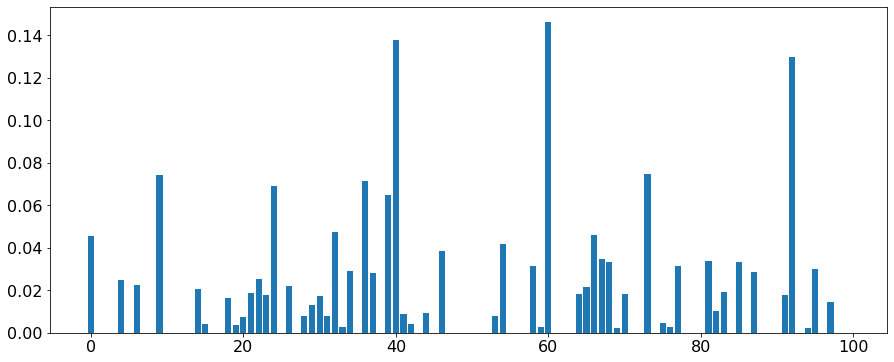

In [13]:
# plot the scores
rcParams['figure.figsize'] = 15, 6
rcParams['font.size'] = 16
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
"""
A bar chart of the feature importance scores for each input feature is created. Compared to the correlation 
feature selection method we can clearly see many more features scored as being relevant. This may be because
of the statistical noise that we added to the dataset in its construction.
"""

# Plan of actions

In [ ]:
"""
There are many different techniques for scoring features and selecting features based on scores; how do you know
which one to use? A robust approach is to evaluate models using different feature selection methods (and numbers
of features) and select the method that results in a model with the best performance. In this section, we will 
evaluate a Linear Regression model with all features compared to a model built from features selected by 
correlation statistics and those features selected via mutual information. Linear regression is a good model 
for testing feature selection methods as it can perform better if irrelevant features are removed from the model.
"""

# Model built using ALL features

In [23]:
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat) 
print('MAE: %.3f' % mae)

MAE: 0.086


# Modifying the select_feature function

In [15]:
# feature selection
def select_features(X_train, y_train, X_test, chosenModel, featuresNo):
    # configure to select a subset (ONLY 10) of features
    fs = SelectKBest(score_func = chosenModel, k = featuresNo)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# Model built using correlation features

In [16]:
# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, f_regression, 10)
# fit the model
model = LinearRegression() 
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 2.740


In [ ]:
"""
In this case, we see that the model achieved an error score of about 2.7, which is 
much larger than the baseline model that used all features and achieved an MAE of 
0.086. This suggests that although the method has a strong idea of what features 
to select, building a model from these features alone does not result in a more 
skillful model. This could be because features that are important to the target 
are being left out, meaning that the method is being deceived about what is important.


-->>POSSIBLE SOLUTION<<--
Let’s go the other way and try to use the method to remove some irrelevant features 
rather than all irrelevant features. We can do this by setting the number of selected
features to a much larger value, in this case, 88, hoping it can find and discard 12 
of the 90 irrelevant features. The complete example is listed below
"""

In [32]:
# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, f_regression, 88)
# fit the model
model = LinearRegression() 
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat) 
print('MAE: %.3f' % mae)

MAE: 0.085


In [ ]:
"""
In this case, we can see that removing some of the irrelevant features has resulted in 
a small lift in performance with an error of about 0.085 compared to the baseline that 
achieved an error of about 0.086.
"""

### Model built using mutual information features

In [33]:
# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, mutual_info_regression, 88)
# fit the model
model = LinearRegression() 
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat) 
print('MAE: %.3f' % mae)

MAE: 0.084


In [ ]:
"""
In this case, we can see a further reduction in error as compared to the correlation statistic, 
achieving a MAE of about 0.084 compared to 0.085 in the previous section.
"""

### Tune the number of selected features

In [37]:
# define dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1,random_state=1)
# define the evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LinearRegression()
fs = SelectKBest(score_func=mutual_info_regression)
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])

# define the grid
grid = dict()
grid['sel__k'] = [i for i in range(X.shape[1]-20, X.shape[1]+1)] 

# define the grid search
search = GridSearchCV(pipeline, grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv) 
# perform the search
results = search.fit(X, y)
# summarize best
print('Best MAE: %.3f' % results.best_score_) 
print('Best Config: %s' % results.best_params_) 
# summarize all
means = results.cv_results_['mean_test_score'] 
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print('>%.3f with: %r' % (mean, param))

Best MAE: -0.082
Best Config: {'sel__k': 81}
>-1.100 with: {'sel__k': 80}
>-0.082 with: {'sel__k': 81}
>-0.082 with: {'sel__k': 82}
>-0.082 with: {'sel__k': 83}
>-0.082 with: {'sel__k': 84}
>-0.082 with: {'sel__k': 85}
>-0.082 with: {'sel__k': 86}
>-0.082 with: {'sel__k': 87}
>-0.082 with: {'sel__k': 88}
>-0.083 with: {'sel__k': 89}
>-0.083 with: {'sel__k': 90}
>-0.083 with: {'sel__k': 91}
>-0.083 with: {'sel__k': 92}
>-0.083 with: {'sel__k': 93}
>-0.083 with: {'sel__k': 94}
>-0.083 with: {'sel__k': 95}
>-0.083 with: {'sel__k': 96}
>-0.083 with: {'sel__k': 97}
>-0.083 with: {'sel__k': 98}
>-0.083 with: {'sel__k': 99}
>-0.083 with: {'sel__k': 100}


In [ ]:
"""
In this case, we can see that the best number of selected features is 81, which achieves a MAE of about 0.082 
"""